In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Flatten
from sklearn.metrics import *
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve, auc

In [7]:
# Load the dataset
data = pd.read_csv('heart_hungary.csv')

# Split features and target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
# X and y should be your features and target variables, respectively

In [8]:
#data.count()

In [9]:
# Create a dataset

# Default heatmap
#p1 = sns.heatmap(data)

In [10]:
#Hybrid Model ETCXGB

from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

# Load the dataset
#data = pd.read_csv('heart.csv')

# Split features and target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the ExtraTree Classifier
ET = ExtraTreesClassifier(n_estimators=100, random_state=42)

ET.fit(X_train, y_train)

# Make predictions using the ExtraTree Classifier
ET_pred = ET.predict(X_test)

# Train the XGBoost model using the predicted class probabilities from the ExtraTree Classifier
xgb_input = np.column_stack((X_test, ET_pred))

xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(xgb_input, y_test)

# Make final predictions using the hybrid model
xgb_pred = xgb_model.predict(xgb_input)

[22:03:50] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Izhan Ahmad\anaconda3\envs\Tensorflow-Environment\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Results of ETCXGB:

[[159   0]
 [  0 149]] 

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       159
           1       1.00      1.00      1.00       149

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308

Sensitivity= 1.0 

Specificity= 1.0 

MCC = 1.0


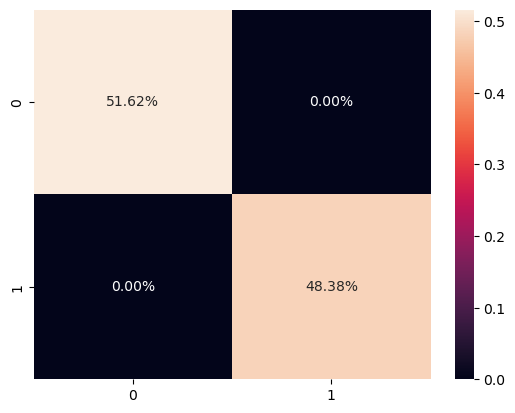

In [11]:
print("Results of ETCXGB:\n")
# Calculate Confusion Matrix
cm=confusion_matrix(y_test, xgb_pred)
TN=cm[0,0]
FN=cm[0,1]
FP=cm[1,0]
TP=cm[1,1]
print(cm,"\n")
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')

# Calculate accuracy score
# Calculate accuracy score
accuracy = accuracy_score(y_test, xgb_pred)
print("Accuracy:", accuracy)

#Classification report
cr = classification_report(y_test, xgb_pred)
print(cr)


#Sensitivity
sen=TP/float(TP+FN)
print("Sensitivity=",sen,"\n")

#Specificity
spe=TN/float(TN+FP)
print("Specificity=",spe,"\n")

#MCC
mcc= float((TP*TN)-(FP*FN))/float(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))
print("MCC =",mcc)


In [12]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred.flatten())
roc_auc = auc(fpr, tpr)
roc_auc

NameError: name 'y_pred' is not defined

ETCXGB Classifier: ROC AUC=1.000


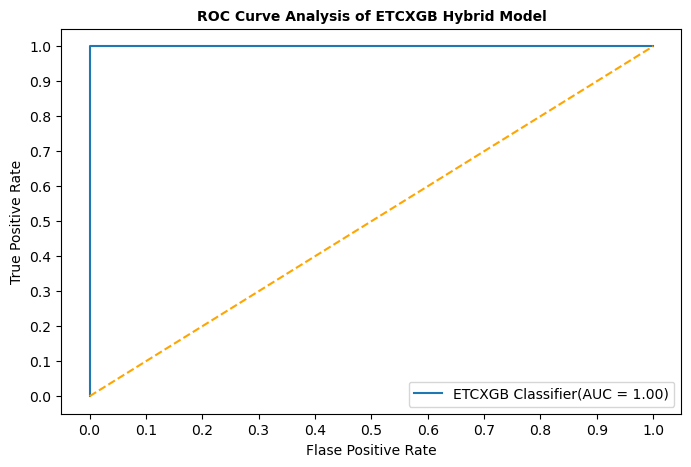

In [13]:
#RoC Curve
fig = plt.figure(figsize=(8,5))
xgb_probs = xgb_model.predict_proba(xgb_input)
# keep probabilities for the positive outcome only
xgb_probs = xgb_probs[:, 1]
# calculate scores
xgb_auc = roc_auc_score(y_test, xgb_probs)

# summarize scores
print('ETCXGB Classifier: ROC AUC=%.3f' % (xgb_auc))

# calculate roc curves
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
# plot the roc curve for the model

plt.plot(xgb_fpr, xgb_tpr, marker='',label='ETCXGB Classifier(AUC = %0.2f)'%xgb_auc)

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=10)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=10)

plt.title('ROC Curve Analysis of ETCXGB Hybrid Model', fontweight='bold', fontsize=10)
plt.legend(prop={'size':10}, loc='lower right')

plt.show()

In [14]:
#CNN-BLSTM Hybrid Model

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Reshape the data to be suitable for the CNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN-BLSTM model
model = Sequential()

# Convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

# Bidirectional LSTM layer
model.add(Bidirectional(LSTM(64, activation='tanh', return_sequences=True)))
model.add(Bidirectional(LSTM(32, activation='tanh')))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and record history
history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_split=0.1)


# Train the model
CNN_LSTM= model.fit(X_train, y_train, epochs=150, batch_size=64, validation_split=0.1)

# Evaluate the model on the test set

#y_pred=CNN_LSTM.predict(X_test)

#loss, accuracy = model.evaluate(X_test, y_test)
#print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype(int).flatten()

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

print("Confusion Matrix:")
print(cm)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_class)
#print(f"Accuracy: {accuracy:.4f}")

Epoch 1/150
11/11 [==============================] - 27s 441ms/step - loss: 0.6902 - accuracy: 0.5240 - val_loss: 0.6792 - val_accuracy: 0.5417
Epoch 2/150
11/11 [==============================] - 0s 42ms/step - loss: 0.6696 - accuracy: 0.6388 - val_loss: 0.6634 - val_accuracy: 0.5556
Epoch 3/150
11/11 [==============================] - 0s 46ms/step - loss: 0.6393 - accuracy: 0.6326 - val_loss: 0.6449 - val_accuracy: 0.6250
Epoch 4/150
11/11 [==============================] - 0s 41ms/step - loss: 0.5937 - accuracy: 0.6915 - val_loss: 0.6041 - val_accuracy: 0.6806
Epoch 5/150
11/11 [==============================] - 0s 29ms/step - loss: 0.5378 - accuracy: 0.7566 - val_loss: 0.5870 - val_accuracy: 0.6944
Epoch 6/150
11/11 [==============================] - 0s 44ms/step - loss: 0.5114 - accuracy: 0.7783 - val_loss: 0.5691 - val_accuracy: 0.6944
Epoch 7/150
11/11 [==============================] - 0s 43ms/step - loss: 0.4873 - accuracy: 0.7829 - val_loss: 0.6053 - val_accuracy: 0.7361
Epoc

11/11 [==============================] - 0s 35ms/step - loss: 0.2106 - accuracy: 0.8992 - val_loss: 0.4557 - val_accuracy: 0.7778
Epoch 59/150
11/11 [==============================] - 0s 36ms/step - loss: 0.1885 - accuracy: 0.9240 - val_loss: 0.5500 - val_accuracy: 0.7639
Epoch 60/150
11/11 [==============================] - 0s 37ms/step - loss: 0.1984 - accuracy: 0.9194 - val_loss: 0.4287 - val_accuracy: 0.7917
Epoch 61/150
11/11 [==============================] - 0s 36ms/step - loss: 0.1704 - accuracy: 0.9256 - val_loss: 0.4335 - val_accuracy: 0.8194
Epoch 62/150
11/11 [==============================] - 0s 38ms/step - loss: 0.1678 - accuracy: 0.9349 - val_loss: 0.4452 - val_accuracy: 0.7917
Epoch 63/150
11/11 [==============================] - 0s 38ms/step - loss: 0.1586 - accuracy: 0.9380 - val_loss: 0.3293 - val_accuracy: 0.8333
Epoch 64/150
11/11 [==============================] - 0s 40ms/step - loss: 0.1954 - accuracy: 0.9116 - val_loss: 0.4616 - val_accuracy: 0.8194
Epoch 65/150

11/11 [==============================] - 0s 35ms/step - loss: 0.0253 - accuracy: 0.9922 - val_loss: 0.1323 - val_accuracy: 0.9722
Epoch 116/150
11/11 [==============================] - 0s 38ms/step - loss: 0.0198 - accuracy: 0.9938 - val_loss: 0.1469 - val_accuracy: 0.9583
Epoch 117/150
11/11 [==============================] - 0s 37ms/step - loss: 0.0163 - accuracy: 0.9984 - val_loss: 0.1356 - val_accuracy: 0.9722
Epoch 118/150
11/11 [==============================] - 0s 38ms/step - loss: 0.0200 - accuracy: 0.9984 - val_loss: 0.1497 - val_accuracy: 0.9722
Epoch 119/150
11/11 [==============================] - 0s 38ms/step - loss: 0.0138 - accuracy: 0.9984 - val_loss: 0.1512 - val_accuracy: 0.9722
Epoch 120/150
11/11 [==============================] - 0s 37ms/step - loss: 0.0165 - accuracy: 0.9969 - val_loss: 0.1323 - val_accuracy: 0.9722
Epoch 121/150
11/11 [==============================] - 0s 38ms/step - loss: 0.0161 - accuracy: 0.9984 - val_loss: 0.2121 - val_accuracy: 0.9583
Epoch 

11/11 [==============================] - 0s 22ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2068 - val_accuracy: 0.9722
Epoch 23/150
11/11 [==============================] - 0s 24ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.2095 - val_accuracy: 0.9722
Epoch 24/150
11/11 [==============================] - 0s 24ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.2157 - val_accuracy: 0.9722
Epoch 25/150
11/11 [==============================] - 0s 23ms/step - loss: 9.9096e-04 - accuracy: 1.0000 - val_loss: 0.2112 - val_accuracy: 0.9722
Epoch 26/150
11/11 [==============================] - 0s 23ms/step - loss: 9.6681e-04 - accuracy: 1.0000 - val_loss: 0.2113 - val_accuracy: 0.9722
Epoch 27/150
11/11 [==============================] - 0s 23ms/step - loss: 9.4890e-04 - accuracy: 1.0000 - val_loss: 0.2078 - val_accuracy: 0.9722
Epoch 28/150
11/11 [==============================] - 0s 25ms/step - loss: 9.2578e-04 - accuracy: 1.0000 - val_loss: 0.2100 - val_accuracy: 0.9

Epoch 78/150
11/11 [==============================] - 0s 39ms/step - loss: 3.7252e-04 - accuracy: 1.0000 - val_loss: 0.2382 - val_accuracy: 0.9722
Epoch 79/150
11/11 [==============================] - 0s 38ms/step - loss: 3.6854e-04 - accuracy: 1.0000 - val_loss: 0.2394 - val_accuracy: 0.9722
Epoch 80/150
11/11 [==============================] - 0s 39ms/step - loss: 3.6311e-04 - accuracy: 1.0000 - val_loss: 0.2386 - val_accuracy: 0.9722
Epoch 81/150
11/11 [==============================] - 0s 38ms/step - loss: 3.6094e-04 - accuracy: 1.0000 - val_loss: 0.2396 - val_accuracy: 0.9722
Epoch 82/150
11/11 [==============================] - 0s 34ms/step - loss: 3.5521e-04 - accuracy: 1.0000 - val_loss: 0.2406 - val_accuracy: 0.9722
Epoch 83/150
11/11 [==============================] - 0s 37ms/step - loss: 3.4825e-04 - accuracy: 1.0000 - val_loss: 0.2418 - val_accuracy: 0.9722
Epoch 84/150
11/11 [==============================] - 0s 37ms/step - loss: 3.4348e-04 - accuracy: 1.0000 - val_loss: 0

11/11 [==============================] - 0s 37ms/step - loss: 1.8092e-04 - accuracy: 1.0000 - val_loss: 0.2558 - val_accuracy: 0.9722
Epoch 134/150
11/11 [==============================] - 0s 39ms/step - loss: 1.7932e-04 - accuracy: 1.0000 - val_loss: 0.2560 - val_accuracy: 0.9722
Epoch 135/150
11/11 [==============================] - 0s 36ms/step - loss: 1.7699e-04 - accuracy: 1.0000 - val_loss: 0.2564 - val_accuracy: 0.9722
Epoch 136/150
11/11 [==============================] - 0s 36ms/step - loss: 1.7520e-04 - accuracy: 1.0000 - val_loss: 0.2567 - val_accuracy: 0.9722
Epoch 137/150
11/11 [==============================] - 0s 37ms/step - loss: 1.7344e-04 - accuracy: 1.0000 - val_loss: 0.2540 - val_accuracy: 0.9722
Epoch 138/150
11/11 [==============================] - 0s 37ms/step - loss: 1.7309e-04 - accuracy: 1.0000 - val_loss: 0.2543 - val_accuracy: 0.9722
Epoch 139/150
11/11 [==============================] - 0s 37ms/step - loss: 1.7090e-04 - accuracy: 1.0000 - val_loss: 0.2562 -

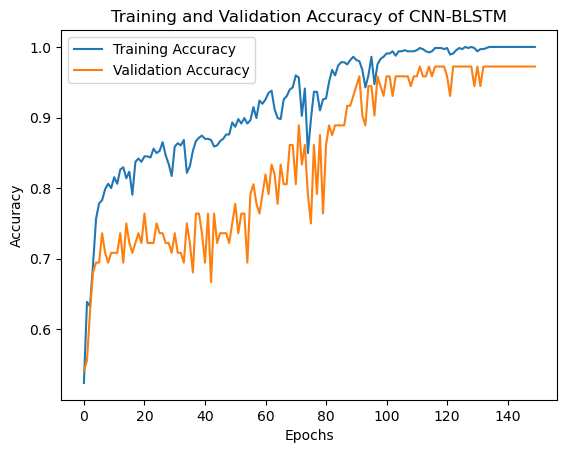

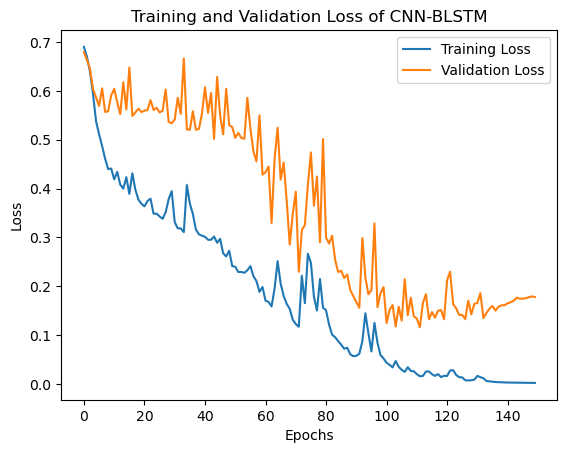

In [18]:
# Training and validation accuracy of CNN-BLSTM
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy of CNN-BLSTM')
plt.legend()
plt.show()

#Trainin and validation loss of CNN-BLSTM
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss of CNN-BLSTM')
plt.legend()
plt.show()

Results of CNN-BLSTM:

[[157   2]
 [  6 143]] 

Accuracy: 0.974025974025974
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       159
           1       0.99      0.96      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308

Sensitivity= 0.9862068965517241 

Specificity= 0.9631901840490797 

MCC = 0.9482743400696363


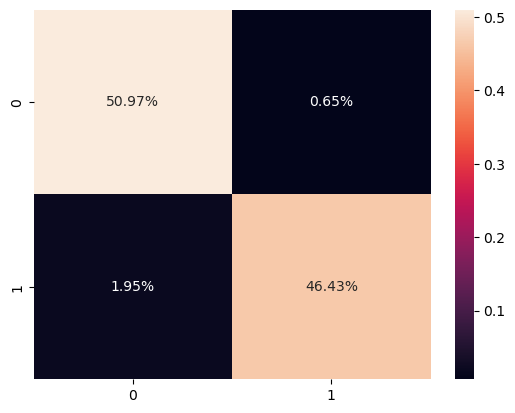

In [19]:
print("Results of CNN-BLSTM:\n")
# Calculate Confusion Matrix
cm=confusion_matrix(y_test, y_pred_class)
TN=cm[0,0]
FN=cm[0,1]
FP=cm[1,0]
TP=cm[1,1]
print(cm,"\n")
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy:", accuracy)

#Classification report
cr = classification_report(y_test, y_pred_class)
print(cr)

#Sensitivity
sen=TP/float(TP+FN)
print("Sensitivity=",sen,"\n")

#Specificity
spe=TN/float(TN+FP)
print("Specificity=",spe,"\n")

#MCC
mcc= float((TP*TN)-(FP*FN))/float(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))
print("MCC =",mcc)


In [20]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Statistical measures of CNN-BLSTM\n")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred.flatten())
roc_auc = auc(fpr, tpr)
roc_auc

Statistical measures of CNN-BLSTM

MSE: 0.0249
MAE: 0.0258
RMSE: 0.1579


0.9775864252247689

10/10 [==============================] - 0s 11ms/step


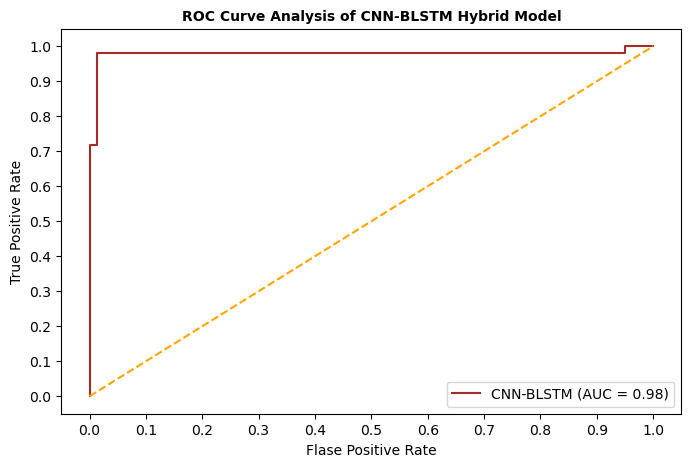

In [23]:
y_pred = model.predict(X_test)
y_pred_probs = y_pred.flatten()

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
fig = plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, color='brown', label='CNN-BLSTM (AUC = %0.2f)' % roc_auc)

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=10)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=10)

plt.title('ROC Curve Analysis of CNN-BLSTM Hybrid Model', fontweight='bold', fontsize=10)
plt.legend(prop={'size':10}, loc='lower right')

plt.show()

In [24]:
#CNN-RNN Hybrid Model

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Reshape the data to be suitable for the CNN-RNN
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN-RNN model
model = Sequential()

# Convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

# LSTM layer
model.add(LSTM(64, activation='tanh', return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, activation='tanh'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and record history
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1)

# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=64, validation_split=0.1)

# Evaluate the model on the test set
#loss, accuracy = model.evaluate(X_test, y_test)
#print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')


# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_CRNN = (y_pred > 0.5).astype(int).flatten()


Epoch 1/150
21/21 [==============================] - 15s 170ms/step - loss: 0.6902 - accuracy: 0.5271 - val_loss: 0.6892 - val_accuracy: 0.5000
Epoch 2/150
21/21 [==============================] - 0s 23ms/step - loss: 0.6773 - accuracy: 0.6357 - val_loss: 0.6720 - val_accuracy: 0.6250
Epoch 3/150
21/21 [==============================] - 0s 21ms/step - loss: 0.6392 - accuracy: 0.6481 - val_loss: 0.6073 - val_accuracy: 0.6667
Epoch 4/150
21/21 [==============================] - 0s 21ms/step - loss: 0.5866 - accuracy: 0.7008 - val_loss: 0.6057 - val_accuracy: 0.7083
Epoch 5/150
21/21 [==============================] - 0s 20ms/step - loss: 0.5292 - accuracy: 0.7380 - val_loss: 0.6284 - val_accuracy: 0.5556
Epoch 6/150
21/21 [==============================] - 0s 21ms/step - loss: 0.5147 - accuracy: 0.7519 - val_loss: 0.6061 - val_accuracy: 0.6528
Epoch 7/150
21/21 [==============================] - 0s 22ms/step - loss: 0.4984 - accuracy: 0.7535 - val_loss: 0.6154 - val_accuracy: 0.6250
Epoc

21/21 [==============================] - 0s 19ms/step - loss: 0.1521 - accuracy: 0.9519 - val_loss: 0.3448 - val_accuracy: 0.8750
Epoch 59/150
21/21 [==============================] - 0s 23ms/step - loss: 0.1335 - accuracy: 0.9597 - val_loss: 0.3612 - val_accuracy: 0.8472
Epoch 60/150
21/21 [==============================] - 0s 21ms/step - loss: 0.1516 - accuracy: 0.9504 - val_loss: 0.3848 - val_accuracy: 0.8472
Epoch 61/150
21/21 [==============================] - 0s 22ms/step - loss: 0.1190 - accuracy: 0.9659 - val_loss: 0.3719 - val_accuracy: 0.8611
Epoch 62/150
21/21 [==============================] - 0s 14ms/step - loss: 0.1275 - accuracy: 0.9550 - val_loss: 0.5025 - val_accuracy: 0.8194
Epoch 63/150
21/21 [==============================] - 0s 18ms/step - loss: 0.1398 - accuracy: 0.9426 - val_loss: 0.3719 - val_accuracy: 0.8333
Epoch 64/150
21/21 [==============================] - 0s 13ms/step - loss: 0.1175 - accuracy: 0.9581 - val_loss: 0.3050 - val_accuracy: 0.8750
Epoch 65/150

21/21 [==============================] - 0s 19ms/step - loss: 0.0720 - accuracy: 0.9814 - val_loss: 0.1983 - val_accuracy: 0.9444
Epoch 116/150
21/21 [==============================] - 0s 19ms/step - loss: 0.0309 - accuracy: 0.9907 - val_loss: 0.1691 - val_accuracy: 0.9167
Epoch 117/150
21/21 [==============================] - 0s 21ms/step - loss: 0.0158 - accuracy: 0.9953 - val_loss: 0.2378 - val_accuracy: 0.9306
Epoch 118/150
21/21 [==============================] - 0s 21ms/step - loss: 0.0136 - accuracy: 0.9984 - val_loss: 0.2016 - val_accuracy: 0.9306
Epoch 119/150
21/21 [==============================] - 0s 23ms/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.2212 - val_accuracy: 0.9583
Epoch 120/150
21/21 [==============================] - 0s 20ms/step - loss: 0.0095 - accuracy: 0.9969 - val_loss: 0.2343 - val_accuracy: 0.9583
Epoch 121/150
21/21 [==============================] - 0s 20ms/step - loss: 0.0089 - accuracy: 0.9984 - val_loss: 0.1782 - val_accuracy: 0.9722
Epoch 

11/11 [==============================] - 0s 30ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2311 - val_accuracy: 0.9722
Epoch 23/150
11/11 [==============================] - 0s 30ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.2338 - val_accuracy: 0.9722
Epoch 24/150
11/11 [==============================] - 0s 29ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2187 - val_accuracy: 0.9722
Epoch 25/150
11/11 [==============================] - 0s 30ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2195 - val_accuracy: 0.9722
Epoch 26/150
11/11 [==============================] - 0s 29ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.2157 - val_accuracy: 0.9722
Epoch 27/150
11/11 [==============================] - 0s 30ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.2196 - val_accuracy: 0.9722
Epoch 28/150
11/11 [==============================] - 0s 24ms/step - loss: 0.0051 - accuracy: 0.9969 - val_loss: 0.2189 - val_accuracy: 0.9722
Epoch 29/150

11/11 [==============================] - 0s 25ms/step - loss: 7.8123e-04 - accuracy: 1.0000 - val_loss: 0.2721 - val_accuracy: 0.9722
Epoch 80/150
11/11 [==============================] - 0s 31ms/step - loss: 0.0041 - accuracy: 0.9984 - val_loss: 0.2956 - val_accuracy: 0.9722
Epoch 81/150
11/11 [==============================] - 0s 31ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3123 - val_accuracy: 0.9722
Epoch 82/150
11/11 [==============================] - 0s 29ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.2629 - val_accuracy: 0.9722
Epoch 83/150
11/11 [==============================] - 0s 30ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.2606 - val_accuracy: 0.9722
Epoch 84/150
11/11 [==============================] - 0s 30ms/step - loss: 8.0764e-04 - accuracy: 1.0000 - val_loss: 0.3072 - val_accuracy: 0.9722
Epoch 85/150
11/11 [==============================] - 0s 34ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.3041 - val_accuracy: 0.9722
Epoc

Epoch 135/150
11/11 [==============================] - 0s 30ms/step - loss: 5.8206e-04 - accuracy: 1.0000 - val_loss: 0.2944 - val_accuracy: 0.9722
Epoch 136/150
11/11 [==============================] - 0s 30ms/step - loss: 4.9831e-04 - accuracy: 1.0000 - val_loss: 0.2963 - val_accuracy: 0.9722
Epoch 137/150
11/11 [==============================] - 0s 30ms/step - loss: 6.5368e-04 - accuracy: 1.0000 - val_loss: 0.2940 - val_accuracy: 0.9722
Epoch 138/150
11/11 [==============================] - 0s 27ms/step - loss: 5.7286e-04 - accuracy: 1.0000 - val_loss: 0.2899 - val_accuracy: 0.9722
Epoch 139/150
11/11 [==============================] - 0s 29ms/step - loss: 5.3905e-04 - accuracy: 1.0000 - val_loss: 0.2872 - val_accuracy: 0.9722
Epoch 140/150
11/11 [==============================] - 0s 27ms/step - loss: 5.2533e-04 - accuracy: 1.0000 - val_loss: 0.2880 - val_accuracy: 0.9722
Epoch 141/150
11/11 [==============================] - 0s 30ms/step - loss: 4.2679e-04 - accuracy: 1.0000 - val_

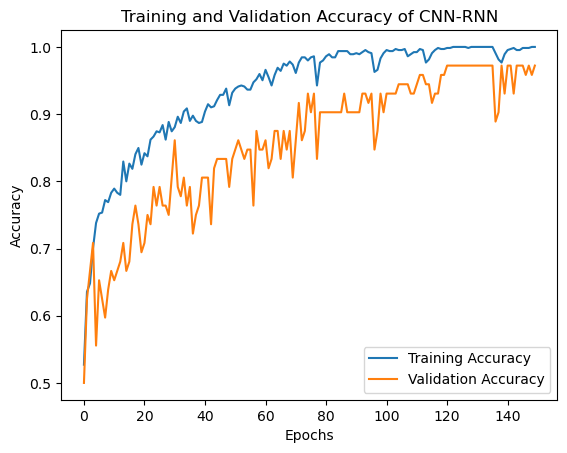

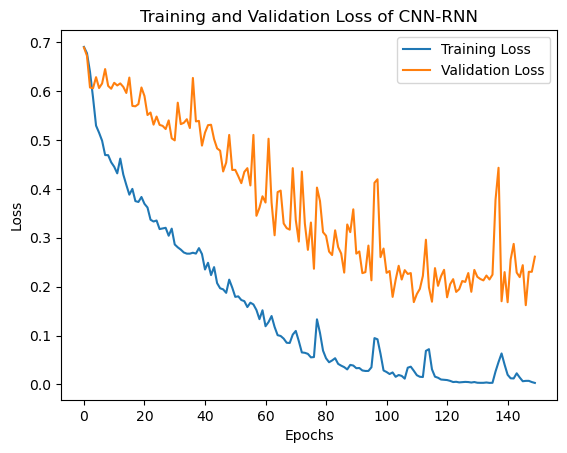

In [25]:
# Training and validation accuracy of CNN-RNN
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy of CNN-RNN')
plt.legend()
plt.show()

#Trainin and validation loss of CNN-RNN
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss of CNN-RNN')
plt.legend()
plt.show()

Results of CNN-RNN:

[[157   2]
 [  6 143]] 

Accuracy: 0.974025974025974
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       159
           1       0.99      0.96      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308

Sensitivity= 0.9862068965517241 

Specificity= 0.9631901840490797 

MCC = 0.9482743400696363


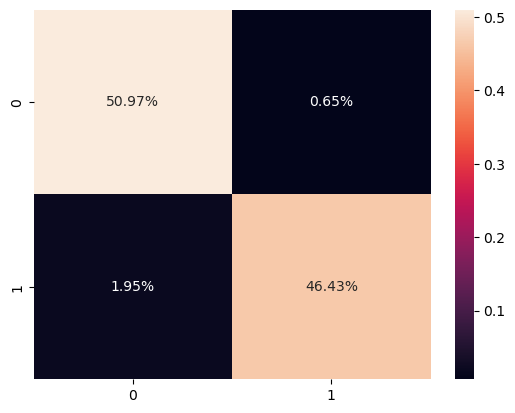

In [26]:
print("Results of CNN-RNN:\n")
# Calculate Confusion Matrix
cm=confusion_matrix(y_test, y_pred_CRNN)
TN=cm[0,0]
FN=cm[0,1]
FP=cm[1,0]
TP=cm[1,1]
print(cm,"\n")
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_CRNN)
print("Accuracy:", accuracy)

#Classification report
cr = classification_report(y_test, y_pred_CRNN)
print(cr)


#Sensitivity
sen=TP/float(TP+FN)
print("Sensitivity=",sen,"\n")

#Specificity
spe=TN/float(TN+FP)
print("Specificity=",spe,"\n")

#MCC
mcc= float((TP*TN)-(FP*FN))/float(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))
print("MCC =",mcc)


In [27]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Statistical measures of CNN-RNN\n")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred.flatten())
roc_auc = auc(fpr, tpr)
roc_auc

Statistical measures of CNN-RNN

MSE: 0.0254
MAE: 0.0263
RMSE: 0.1593


0.9954835169473639

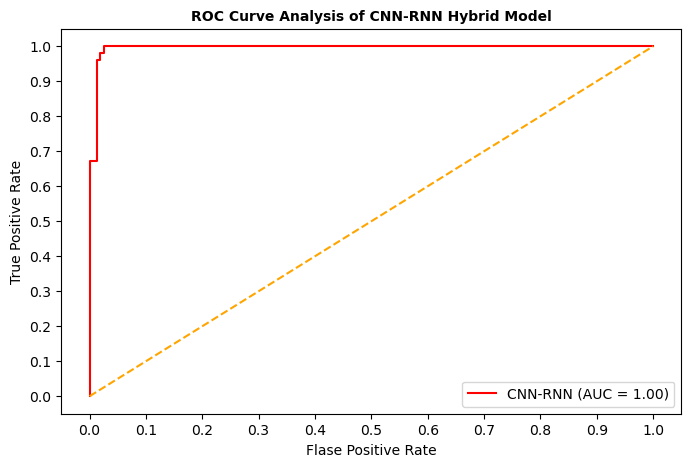

In [29]:
# Plot the ROC curve
fig = plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, color='red', label='CNN-RNN (AUC = %0.2f)' % roc_auc)

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=10)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=10)

plt.title('ROC Curve Analysis of CNN-RNN Hybrid Model', fontweight='bold', fontsize=10)
plt.legend(prop={'size':10}, loc='lower right')

plt.show()


In [30]:
#CNN-LSTM Hybrid Model

import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Reshape the data to be suitable for the CNN-LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the CNN-LSTM model
model = Sequential()

# Convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

# Convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# LSTM layer
model.add(LSTM(64, activation='tanh'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=150, batch_size=64, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_CNN_LSTM = (y_pred > 0.5).astype(int).flatten()


Epoch 1/150
11/11 [==============================] - 9s 215ms/step - loss: 0.6890 - accuracy: 0.5783 - val_loss: 0.6877 - val_accuracy: 0.5417
Epoch 2/150
11/11 [==============================] - 0s 17ms/step - loss: 0.6813 - accuracy: 0.5767 - val_loss: 0.6805 - val_accuracy: 0.6111
Epoch 3/150
11/11 [==============================] - 0s 17ms/step - loss: 0.6667 - accuracy: 0.6775 - val_loss: 0.6625 - val_accuracy: 0.6389
Epoch 4/150
11/11 [==============================] - 0s 16ms/step - loss: 0.6449 - accuracy: 0.6884 - val_loss: 0.6384 - val_accuracy: 0.6250
Epoch 5/150
11/11 [==============================] - 0s 15ms/step - loss: 0.6029 - accuracy: 0.7535 - val_loss: 0.6114 - val_accuracy: 0.7222
Epoch 6/150
11/11 [==============================] - 0s 17ms/step - loss: 0.5571 - accuracy: 0.7690 - val_loss: 0.5778 - val_accuracy: 0.6944
Epoch 7/150
11/11 [==============================] - 0s 18ms/step - loss: 0.5129 - accuracy: 0.7597 - val_loss: 0.5735 - val_accuracy: 0.7222
Epoch

11/11 [==============================] - 0s 16ms/step - loss: 0.0727 - accuracy: 0.9829 - val_loss: 0.2331 - val_accuracy: 0.8889
Epoch 59/150
11/11 [==============================] - 0s 17ms/step - loss: 0.0659 - accuracy: 0.9876 - val_loss: 0.2333 - val_accuracy: 0.9167
Epoch 60/150
11/11 [==============================] - 0s 17ms/step - loss: 0.0620 - accuracy: 0.9860 - val_loss: 0.2365 - val_accuracy: 0.8889
Epoch 61/150
11/11 [==============================] - 0s 17ms/step - loss: 0.0653 - accuracy: 0.9798 - val_loss: 0.3125 - val_accuracy: 0.8333
Epoch 62/150
11/11 [==============================] - 0s 17ms/step - loss: 0.1023 - accuracy: 0.9581 - val_loss: 0.2115 - val_accuracy: 0.9028
Epoch 63/150
11/11 [==============================] - 0s 17ms/step - loss: 0.0744 - accuracy: 0.9721 - val_loss: 0.2154 - val_accuracy: 0.9167
Epoch 64/150
11/11 [==============================] - 0s 19ms/step - loss: 0.0675 - accuracy: 0.9767 - val_loss: 0.2284 - val_accuracy: 0.9167
Epoch 65/150

11/11 [==============================] - 0s 16ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.1754 - val_accuracy: 0.9444
Epoch 116/150
11/11 [==============================] - 0s 17ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.1835 - val_accuracy: 0.9444
Epoch 117/150
11/11 [==============================] - 0s 17ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.1893 - val_accuracy: 0.9444
Epoch 118/150
11/11 [==============================] - 0s 13ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.1834 - val_accuracy: 0.9722
Epoch 119/150
11/11 [==============================] - 0s 11ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.1840 - val_accuracy: 0.9444
Epoch 120/150
11/11 [==============================] - 0s 10ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.2033 - val_accuracy: 0.9444
Epoch 121/150
11/11 [==============================] - 0s 10ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.1720 - val_accuracy: 0.9722
Epoch 

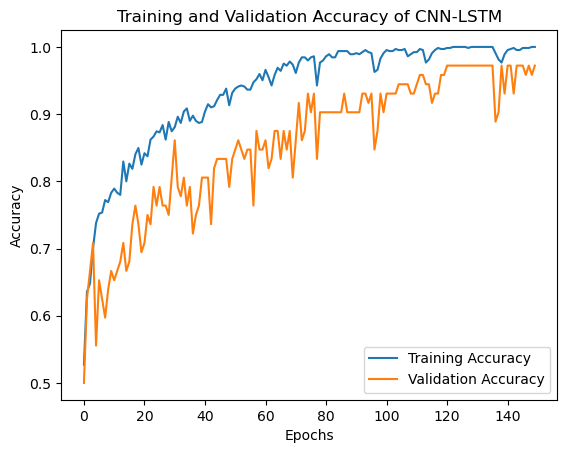

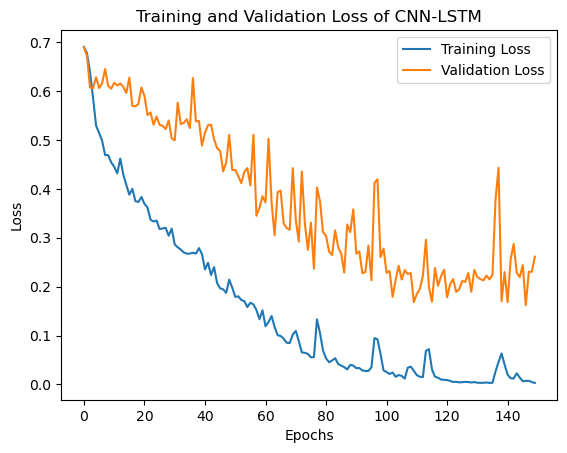

In [31]:
# Training and validation accuracy of CNN-LSTM
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy of CNN-LSTM')
plt.legend()
plt.show()

#Trainin and validation loss of CNN-LSTM
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss of CNN-LSTM')
plt.legend()
plt.show()

Results of CNN-LSTM:

[[155   4]
 [  2 147]] 

Accuracy: 0.9805194805194806
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       159
           1       0.97      0.99      0.98       149

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

Sensitivity= 0.9735099337748344 

Specificity= 0.9872611464968153 

MCC = 0.9610954596285256


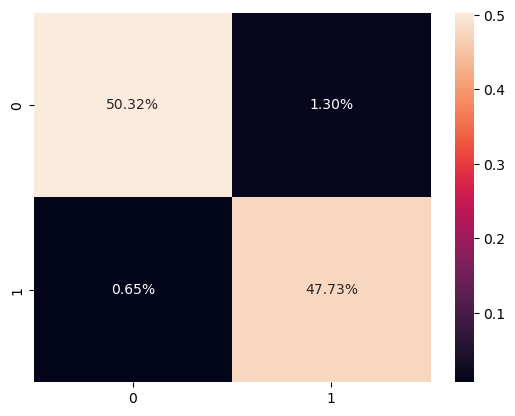

In [32]:
print("Results of CNN-LSTM:\n")

# Calculate Confusion Matrix
cm=confusion_matrix(y_test, y_pred_CNN_LSTM)
TN=cm[0,0]
FN=cm[0,1]
FP=cm[1,0]
TP=cm[1,1]

print(cm,"\n")
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%')

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_CNN_LSTM)
print("Accuracy:", accuracy)

#Classification report
cr = classification_report(y_test, y_pred_CNN_LSTM)
print(cr)


#Sensitivity
sen=TP/float(TP+FN)
print("Sensitivity=",sen,"\n")

#Specificity
spe=TN/float(TN+FP)
print("Specificity=",spe,"\n")

#MCC
mcc= float((TP*TN)-(FP*FN))/float(math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)))
print("MCC =",mcc)

In [33]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Statistical measures of CNN-LSTM\n")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred.flatten())
roc_auc = auc(fpr, tpr)
roc_auc

Statistical measures of CNN-LSTM

MSE: 0.0172
MAE: 0.0245
RMSE: 0.1311


0.9928242792621671

<Figure size 800x500 with 0 Axes>

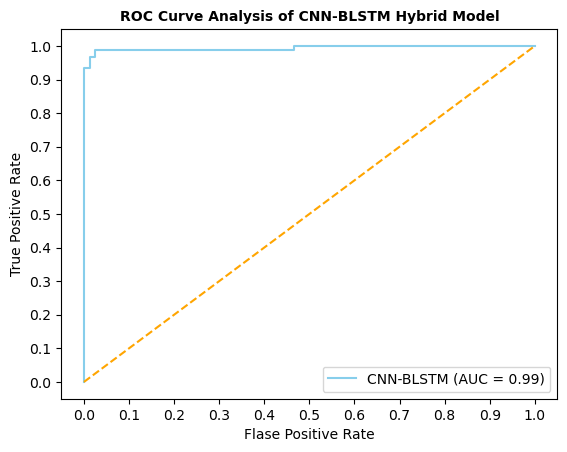

In [35]:
# Calculate the ROC curve

fig = plt.figure(figsize=(8,5))

fpr, tpr, thresholds = roc_curve(y_test, y_pred.flatten())
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='skyblue', label='CNN-BLSTM (AUC = %0.2f)' % roc_auc)
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=10)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=10)

plt.title('ROC Curve Analysis of CNN-BLSTM Hybrid Model', fontweight='bold', fontsize=10)
plt.legend(prop={'size':10}, loc='lower right')

plt.show()
